## Problem Statement
# Prediction of Movie Genres from Posters

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle

# Data Collection
### IMDB and TMDB are the open source movie databases we can scrape data from these webpages

In [2]:
"""
Libraries for scraping
"""
import urllib2

from imdbpie import Imdb
import time

import wget
import os
import tmdbsimple as tmdb

In [3]:
import requests
import json
import pickle

In [4]:
"""
This key is used to scrap the data
"""
tmdb_key='91d6e81b86e71a96990784151a13f29b'
tmdb.API_KEY = tmdb_key
search = tmdb.Search()

In [4]:
movie=search.movie(query="The War Of The Planet Of Apes")
result_info=tmdb.Movies(movie['results'][0]['id'])
result_info.info()['genres']

KeyboardInterrupt: 

In [6]:
all_genres=tmdb.Genres()
all_genres=all_genres.list()

In [7]:
all_genres=all_genres['genres']

In [8]:
"""
Creating a dictionary for getting gener name from its id
"""
genres_names={}
for i in range(0,len(all_genres)):
    genres_names[all_genres[i]['id']]=all_genres[i]['name']

In [9]:
"""
Now we have a dictionary for genre names and their ids
"""
genres_names[10769]="Foreign"

In [29]:
"""
Getting movie lists from tmdb
copied from 
https://www.johannesbader.ch/2013/11/tutorial-download-posters-with-the-movie-database-api-in-python/
"""
tmdb_list=tmdb.Movies()
dataset=[]
for i in range(1,41):
    page_movie=tmdb_list.popular(page=i)
    result=page_movie['results']
    dataset.extend(result)
    if i%10==0:
        time.sleep(10)
print "done movie loaded"

KeyboardInterrupt: 

In [ ]:
len(dataset)

In [ ]:

file_open=open('movie_dataset.pckl','wb')
pickle.dump(dataset,file_open)
file_open.close()

In [30]:
genre_ids=genres_names.keys()

In [40]:
request="https://api.themoviedb.org/3/movie/550?api_key=91d6e81b86e71a96990784151a13f29b&language=en-US&sort_by=popularity.desc&year=2017&with_genres=10&page=5"

https://api.themoviedb.org/3/movie/550?api_key=91d6e81b86e71a96990784151a13f29b
Example string to request on IMDbPY api

In [18]:
"""
This cell gets 100 samples for each genre, code snippet copied from 
https://www.johannesbader.ch/2013/11/tutorial-download-posters-with-the-movie-database-api-in-python/ 
"""
movies_per_genre=[]
current_year=2018
for _id in genre_ids:
    current_year-=1
    #"20 movies per page get 100 movies"
    for j in xrange(1,6,1):
        time.sleep(1)
        #only limited to 40 request per 10 sec
        requestString='https://api.themoviedb.org/3/discover/movie?api_key='+tmdb_key
        requestString+='&language=en-US&sort_by=popularity.desc&year='+str(current_year)+'&with_genres='+str(_id)
        requestString+='&page='+str(j)
        json_data=urllib2.urlopen(requestString).read()
        data=json.loads(json_data)
        movies_per_genre.extend(data['results'])
        

In [19]:
file_open=open("movies_per_genres","wb")
pickle.dump(movies_per_genre,file_open)
file_open.close()

In [44]:
movie_ids = [movie['id'] for movie in movies_per_genre]
print "Duplicate Movies =",len(movie_ids)-len(np.unique(movie_ids))


Duplicate Movies = 83


In [45]:
#"One movie can have multiple genres so there are many duplicate movies in respect to thier genre"
unique_ids=[]
unique_movies=[]
for i in range(len(movies_per_genre)):
    id_=movies_per_genre[i]['id']
    if id_ in unique_ids:
        continue
    else:
        unique_ids.append(id_)
        unique_movies.append(movies_per_genre[i])
print "Unique Movies Done"    

Unique Movies Done


In [49]:
len(unique_movies)

1755

In [25]:
"""
This funtion downloads a movie poster given its name, copied from 
https://www.johannesbader.ch/2013/11/tutorial-download-posters-with-the-movie-database-api-in-python/
"""
def download_poster(movie_name):
    query_url=search.movie(query=movie_name)
    movie_info=tmdb.Movies(query_url['results'][0]['id'])
    movie_title=movie_info.info()['original_title']
    movie_title='_'.join(movie_title.split(' '))
    request_poster='wget -O '+"Posters/"+movie_title+".jpg "+'image.tmdb.org/t/p/original'+movie_info.info()['poster_path']
    os.system(request_poster)

In [20]:
file_open=open("movies_per_genres","r")
movies_per_genre=pickle.load(file_open)
file_open.close()

In [26]:
print "Posters downloading"
movie_posters=[]
failed_downloads=[]
for m in movies_per_genre:
    try:
        download_poster(m['title'])
        movie_posters.append(m)
    except:
        try:
            time.sleep(7)
            download_poster(m['title'])
            movie_posters.append(m)
        except:
            failed_downloads.append(m)
print "Posters Downloaded"        

Posters downloading
Posters Downloaded


In [27]:
file_open=open("movie_posters.pckl","wb")
pickle.dump(movie_posters,file_open)
file_open.close()


In [28]:
file_open=open("failed_posters.pckl","wb")
pickle.dump(failed_downloads,file_open)
file_open.close()

In [30]:
len(failed_downloads)

220

In [31]:
len(movie_posters)

1618

# Data Scraping Done

In [34]:
poster_directory=os.listdir("./Posters")

In [35]:
poster_images=[i for i in poster_directory if i.endswith(".jpg")]

In [27]:
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input

In [28]:
from keras.applications.resnet50 import ResNet50


In [30]:
model=ResNet50(include_top=False)

In [42]:
from tensorflow.contrib import keras


# Downloaded Posters

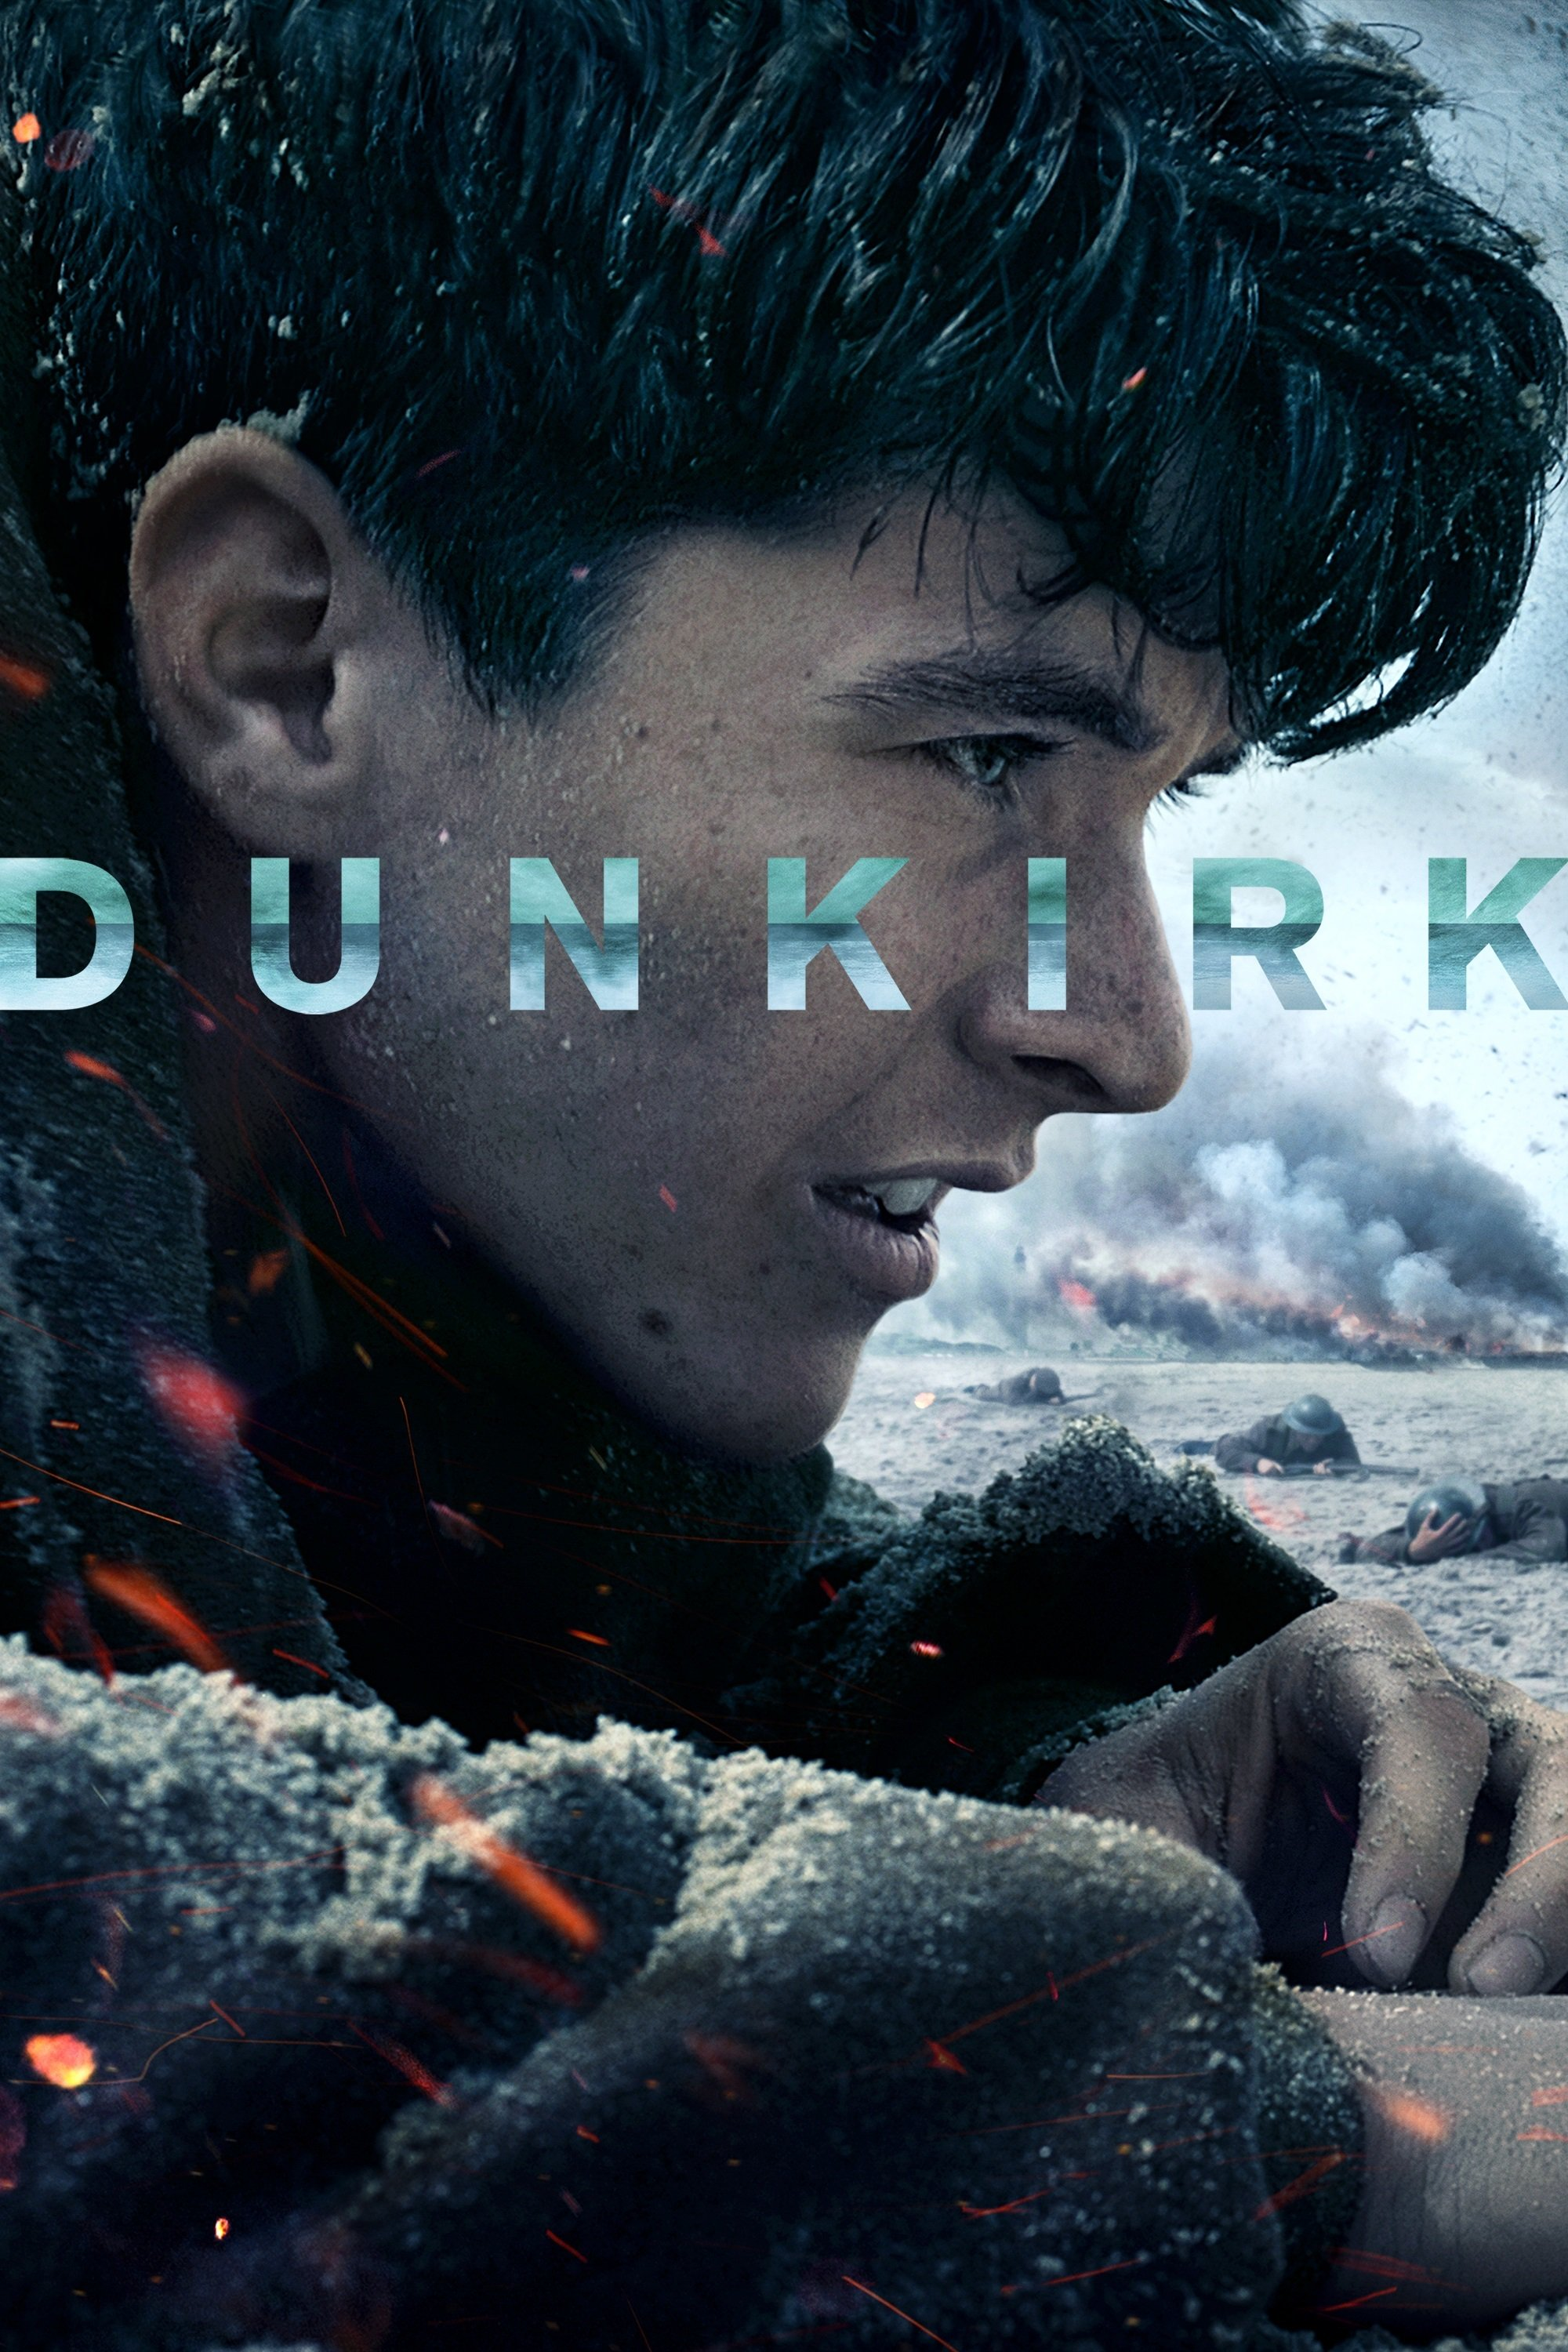

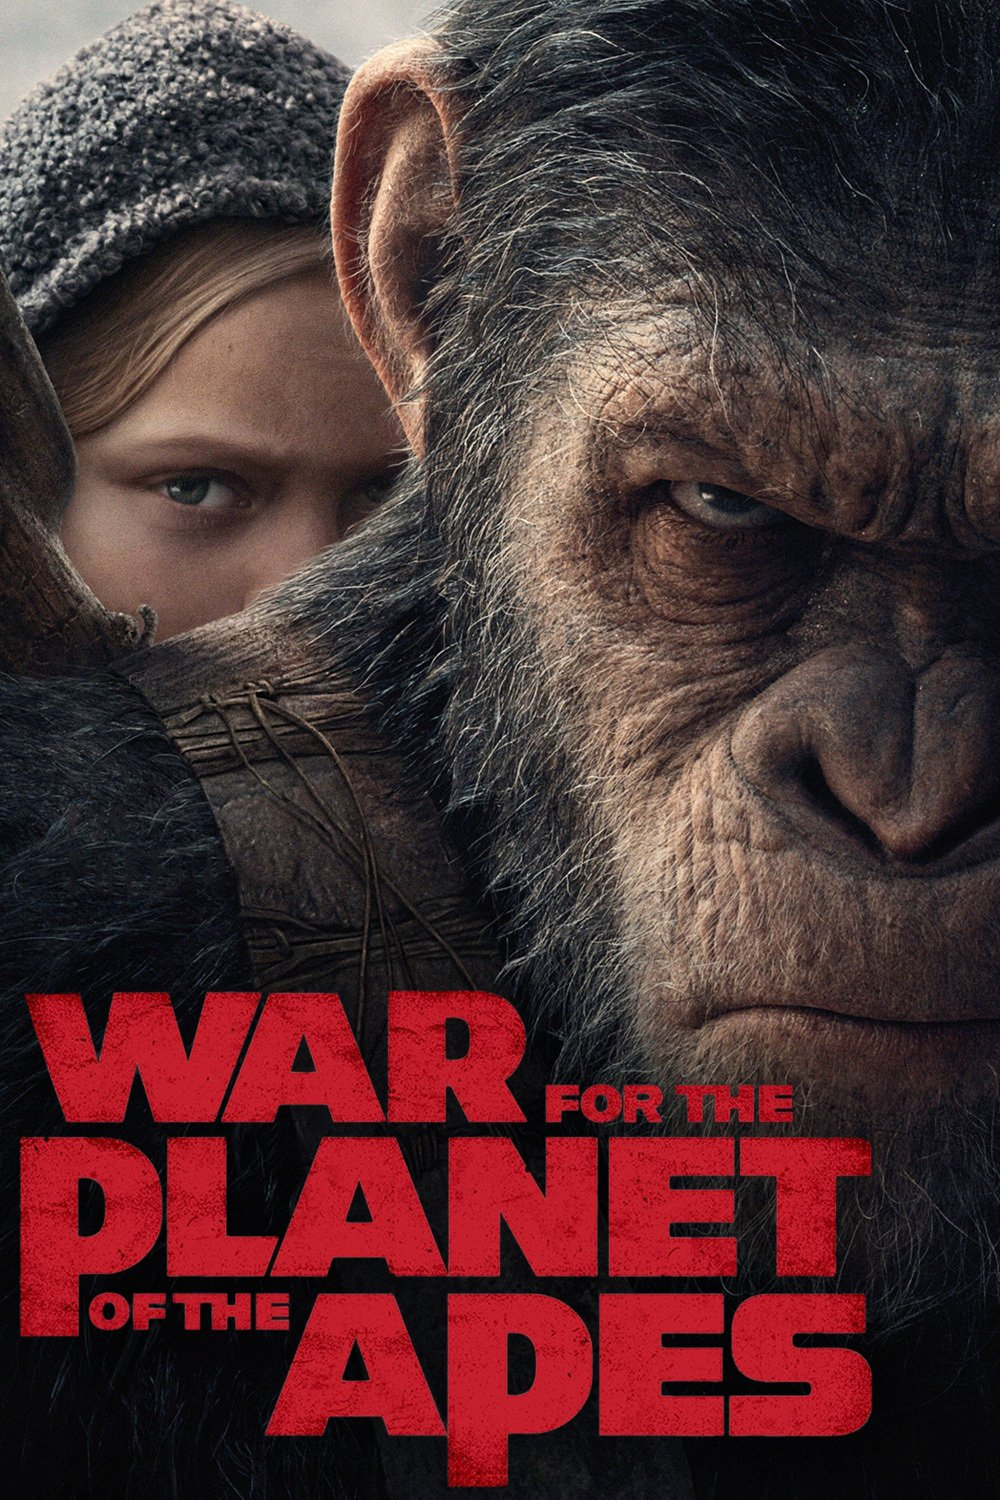

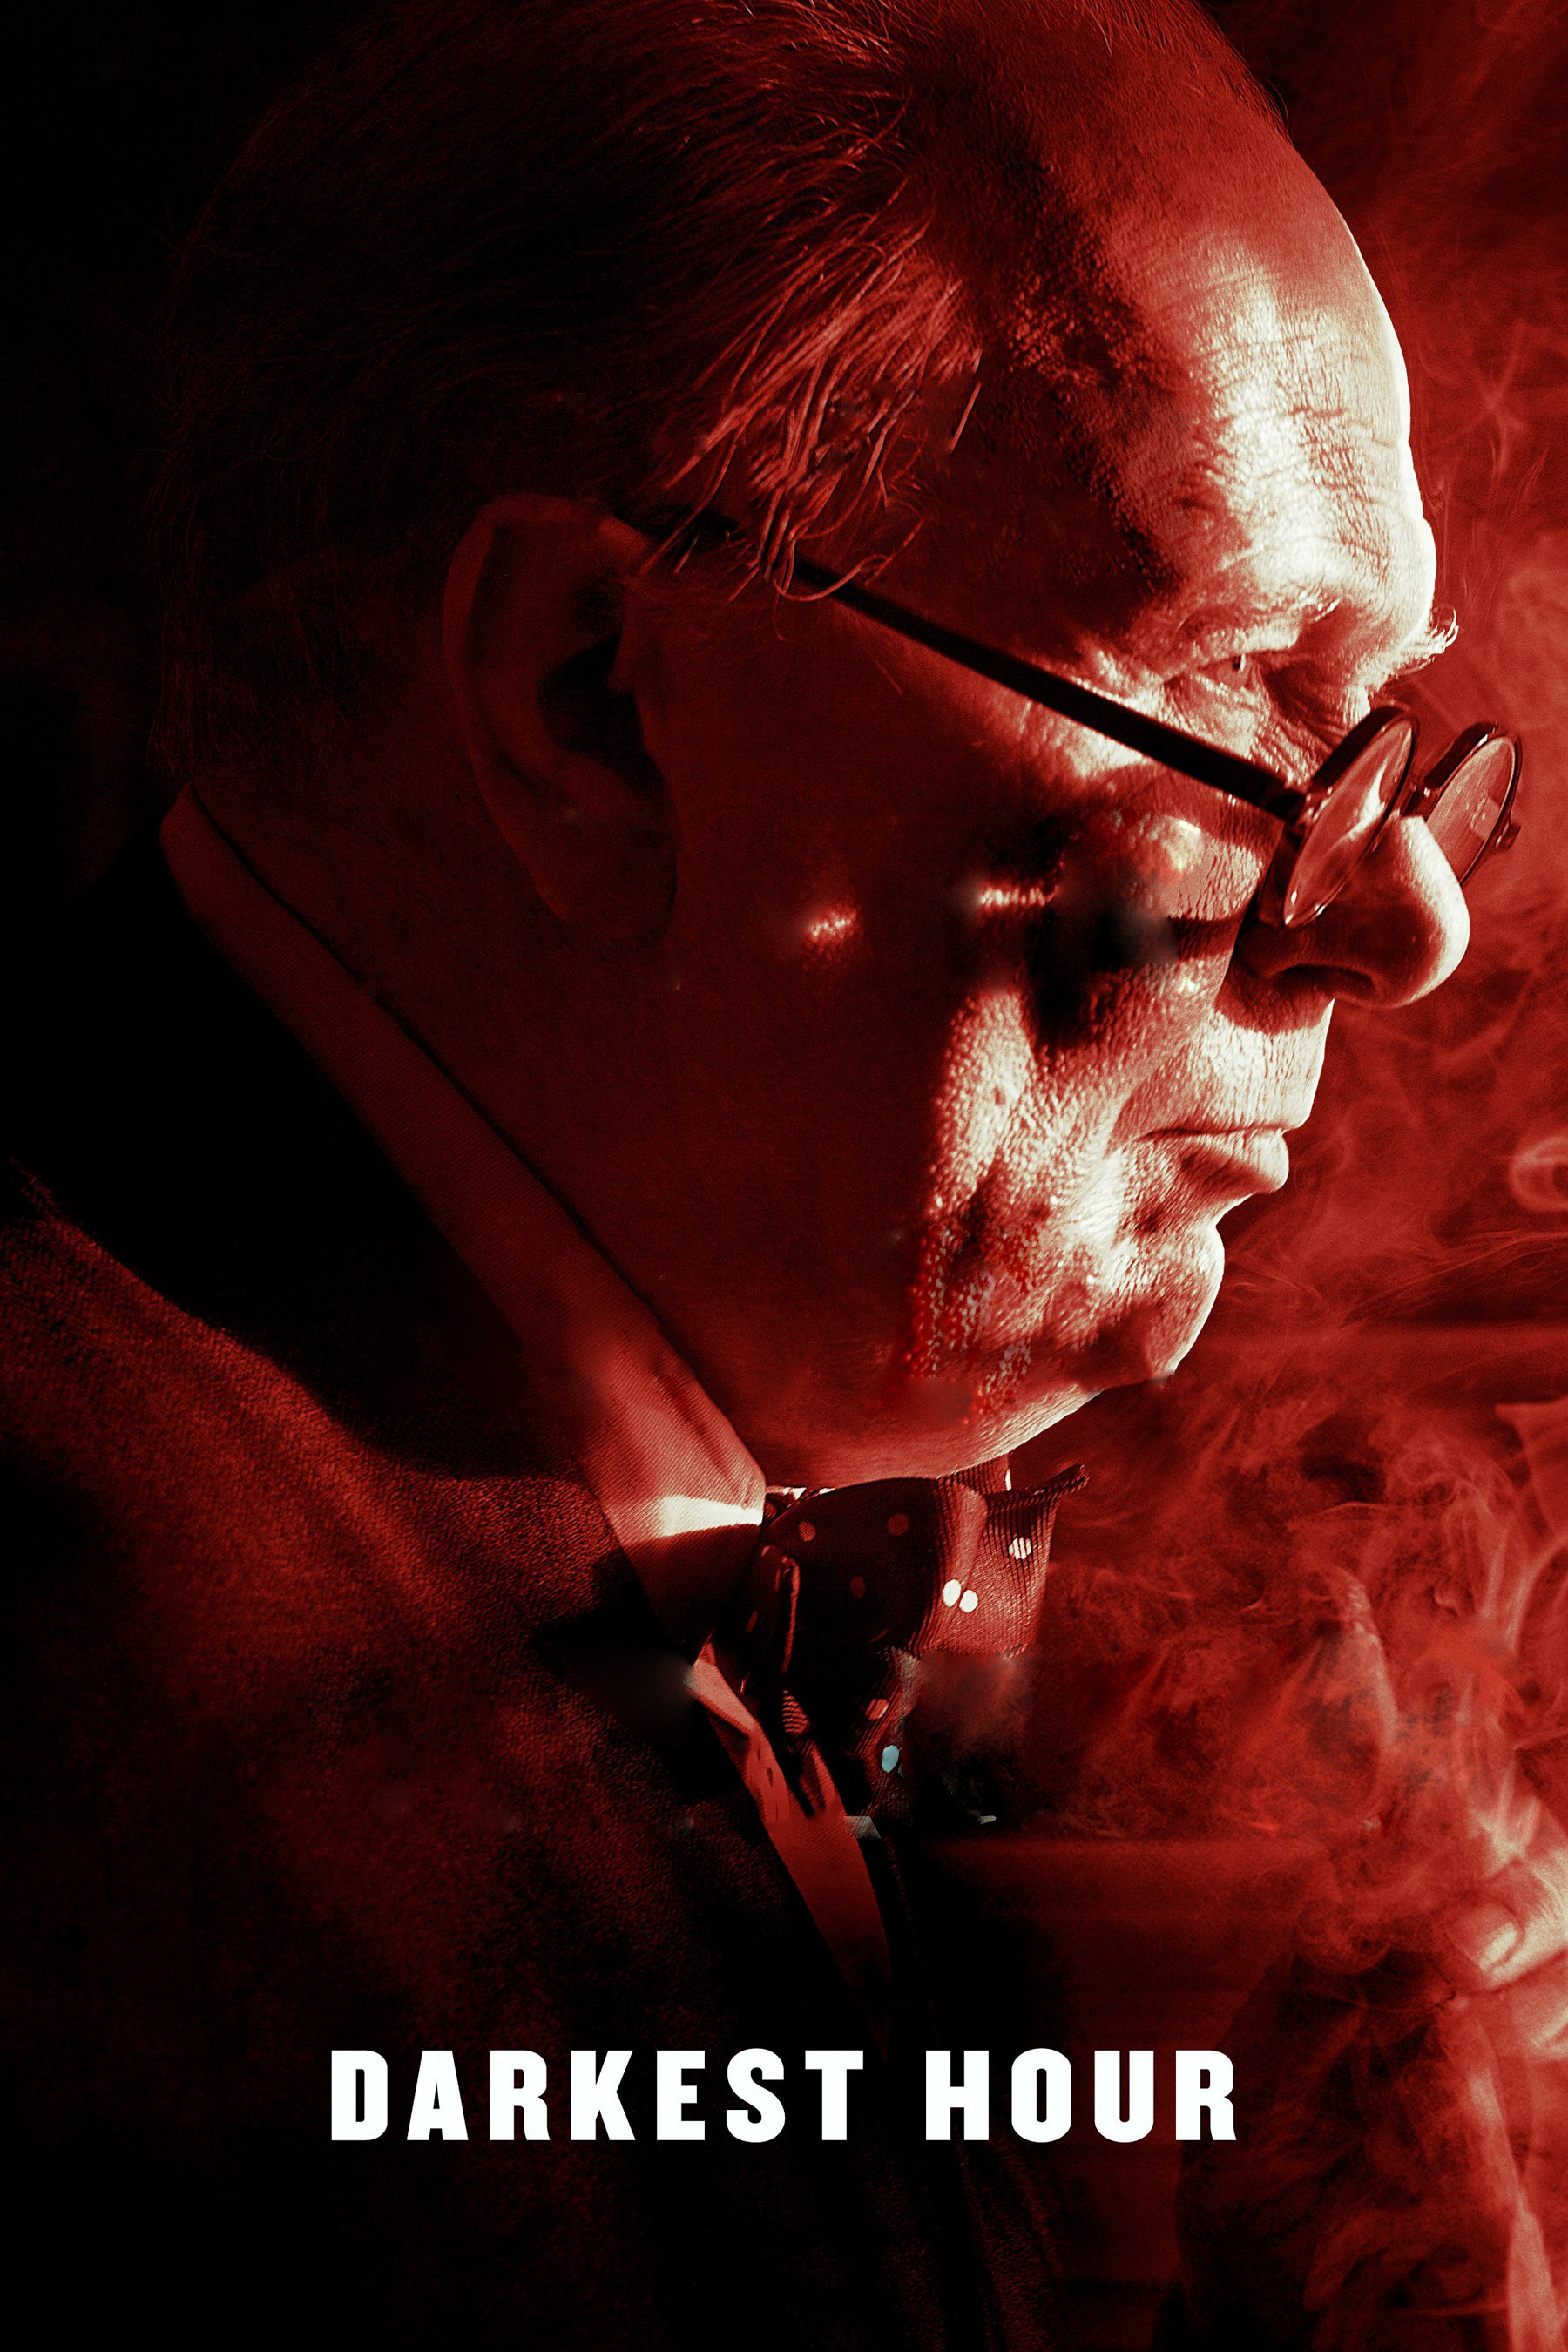

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [174]:
i=0
for each_movie in movie_posters:
    title=each_movie['title']
    image_name=title.replace(' ','_')+".jpg"
    if image_name in poster_images:
        image_directory="Posters/"+image_name
        try:
            display(Image(filename=image_directory,height=200,width=300))
            i+=1
            if i==5:
                break
        except:
            continue
    else:
        continue
                

# Training Time With ResNet

In [103]:
labels=[]
X_images=[]
no_images=[]
i=0
for each_movie in movie_posters:
    title=each_movie['title']
    i+=1
    image_name=title.replace(' ','_')+".jpg"
    if image_name in poster_images:
        image_directory="Posters/"+image_name
        try:
            load_image=image.load_img(image_directory,target_size=(224,224))
            input_x=image.img_to_array(load_image)
            input_x=np.expand_dims(input_x,axis=0)
            input_x=preprocess_input(input_x)
            weights=model.predict(input_x)
            X_images.append(weights)
            labels.append(each_movie['genre_ids'])
            no_images.append(image_name)
            if i%100==0:
                print "images done",i
        except:
            continue
    else:
        continue

"Images learned the weights of resnet50"
    

images done 100
images done 200
images done 400
images done 500
images done 600
images done 700
images done 800
images done 900
images done 1100
images done 1200
images done 1300
images done 1400
images done 1500
images done 1600


'Images learned the weights of resnet50'

In [105]:
training_set=(X_images,labels)
file_open=open("training_set_2","wb")
pickle.dump(training_set,file_open)
file_open.close()

In [10]:
file_open=open("training_set_2","r")
training_set=pickle.load(file_open)
file_open.close()
X_images,labels=training_set

In [11]:
X_train=np.zeros((len(X_images),X_images[0].shape[3]))

In [12]:
for i in range(len(X_images)):
    X_train[i]=X_images[i].reshape(1,-1)
    

In [13]:
X_train.shape

(1352, 2048)

In [14]:
from sklearn.preprocessing import MultiLabelBinarizer
label_encoder=MultiLabelBinarizer()
Y_train=label_encoder.fit_transform(labels)

In [15]:
Y_train.shape

(1352, 20)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, X_test, y_train, y_test=train_test_split(X_train,Y_train,test_size=0.2)

In [19]:
from keras.models import Sequential
from keras.layers import Dense, Activation
new_model=Sequential()
new_model.add(Dense(1100,input_shape=(2048,)))
new_model.add(Activation('relu'))
new_model.add(Dense(800))
new_model.add(Activation('relu'))
new_model.add(Dense(300))
new_model.add(Activation('relu'))
new_model.add(Dense(20))
new_model.add(Activation('sigmoid'))

Using TensorFlow backend.


In [20]:
new_model.compile(optimizer="rmsprop",loss='binary_crossentropy',metrics=['accuracy'])
new_model.fit(x_train, y_train, epochs=30, batch_size=64,verbose=1,validation_data=(X_test,y_test))

Train on 1081 samples, validate on 271 samples
Epoch 1/30
1081/1081 [==============================] - 2s - loss: 0.8802 - acc: 0.8056 - val_loss: 0.3980 - val_acc: 0.8419
Epoch 2/30
1081/1081 [==============================] - 1s - loss: 0.3613 - acc: 0.8553 - val_loss: 0.3547 - val_acc: 0.8561
Epoch 3/30
1081/1081 [==============================] - 1s - loss: 0.3445 - acc: 0.8611 - val_loss: 0.3517 - val_acc: 0.8461
Epoch 4/30
1081/1081 [==============================] - 3s - loss: 0.3222 - acc: 0.8685 - val_loss: 0.3679 - val_acc: 0.8376
Epoch 5/30
1081/1081 [==============================] - 1s - loss: 0.3110 - acc: 0.8699 - val_loss: 0.3574 - val_acc: 0.8581
Epoch 6/30
1081/1081 [==============================] - 1s - loss: 0.2875 - acc: 0.8809 - val_loss: 0.3368 - val_acc: 0.8611
Epoch 7/30
1081/1081 [==============================] - 1s - loss: 0.2742 - acc: 0.8853 - val_loss: 0.3516 - val_acc: 0.8613
Epoch 8/30
1081/1081 [==============================] - 1s - loss: 0.2539 - ac

In [44]:
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1100)              2253900   
_________________________________________________________________
activation_5 (Activation)    (None, 1100)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 800)               880800    
_________________________________________________________________
activation_6 (Activation)    (None, 800)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 300)               240300    
_________________________________________________________________
activation_7 (Activation)    (None, 300)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 20)                6020      
__________

In [14]:
y_preds=new_model.predict(X_test)

In [15]:
y_preds.shape

(271, 20)

In [32]:
genres=sorted(list(genres_names.keys()))

In [ ]:
new_model.

In [289]:
print genres_names.values()

[u'War', u'Crime', u'Music', u'Comedy', u'History', u'Western', u'Thriller', u'Mystery', u'Adventure', u'TV Movie', u'Fantasy', u'Animation', 'Foreign', u'Drama', u'Documentary', u'Science Fiction', u'Horror', u'Action', u'Romance', u'Family']


# Predictions on Validation TestData

In [266]:
for i in range(len(y_preds)):
    label_i=y_preds[i]
    true_labels_i=y_test[i]
    label_names=[]
    for j in range(20):
        if true_labels_i[j]!=0:
            label_names.append(genres_names[genres[j]])
    #print label_i
    #print (label_i[label_i>=0.3])
    max_prob_labels=np.argsort(label_i)[-3:]
    movie_genres=[]
    for label in max_prob_labels:
        movie_genres.append(genres_names[genres[label]])
    if i%10==0:
        print "Model Genres: ",','.join(movie_genres)+'\t'," Original: ",','.join(label_names)

Model Genres:  Fantasy,Animation,Family	 Original:  Drama,Comedy,TV Movie
Model Genres:  Animation,Fantasy,Adventure	 Original:  Adventure,Fantasy,Animation,Action
Model Genres:  Action,Science Fiction,Horror	 Original:  Horror,Thriller,Mystery
Model Genres:  Drama,Crime,Thriller	 Original:  Action,Thriller,Crime
Model Genres:  Crime,Thriller,Drama	 Original:  Thriller,Crime
Model Genres:  Fantasy,Science Fiction,Action	 Original:  Horror,Action,Thriller,Science Fiction
Model Genres:  Thriller,Action,Adventure	 Original:  Adventure,Horror,Action,Thriller
Model Genres:  TV Movie,Science Fiction,Thriller	 Original:  Horror
Model Genres:  TV Movie,History,Drama	 Original:  Adventure,Fantasy,Drama,Comedy,Family
Model Genres:  Horror,Science Fiction,Thriller	 Original:  Horror,Thriller,Science Fiction
Model Genres:  Crime,Thriller,Comedy	 Original:  Thriller,Science Fiction,Romance
Model Genres:  History,TV Movie,Drama	 Original:  Drama,Romance
Model Genres:  Adventure,Mystery,Drama	 Origin

# Predictions on Test Images

In [25]:
from IPython.display import Image

def test_images(image_name):
    load_image=image.load_img(image_name,target_size=(224,224))
    display(Image(filename=image_name))
    input_x=image.img_to_array(load_image)
    input_x=np.expand_dims(input_x,axis=0)
    input_x=preprocess_input(input_x)
    weights=model.predict(input_x)
    reshaped=weights.reshape(1,-1)
    print "weights",weights.shape
    print "reshaped",reshaped.shape
    pred=new_model.predict(reshaped)
    pred=pred[0]
    top_labels=np.argsort(pred)[-3:]
    movie_genres=[]
    print top_labels
    for label in top_labels:
        print label
        movie_genres.append(genres_names[genres[label]])
    return movie_genres
    
    
        

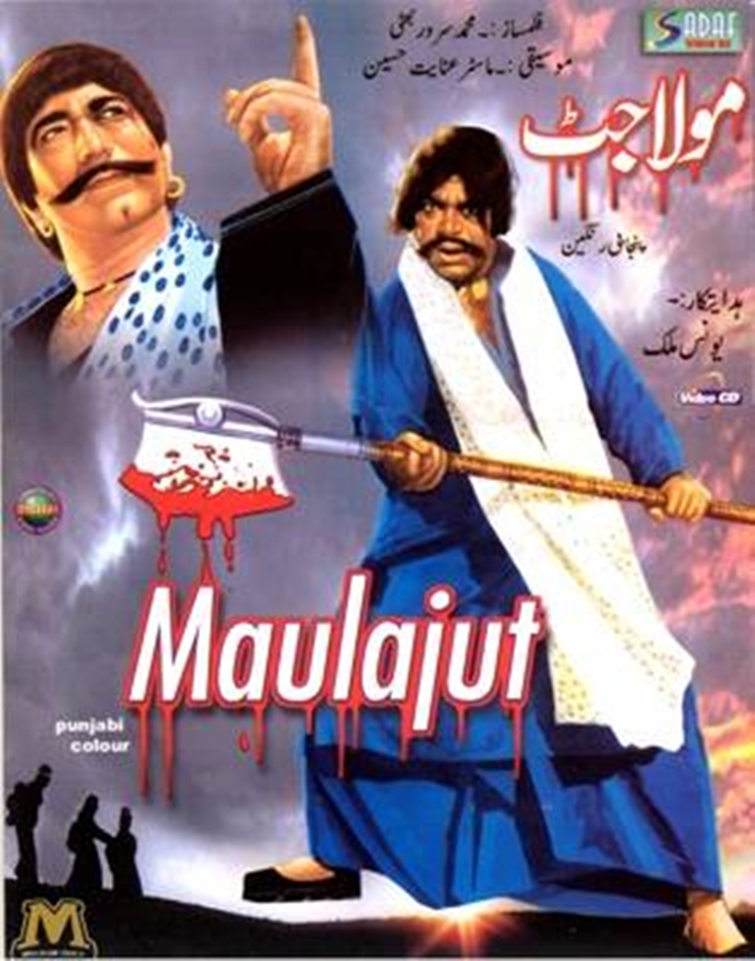

weights (1, 1, 1, 2048)
reshaped (1, 2048)
[19  6  0]
19
6
0


[u'TV Movie', u'Comedy', u'Adventure']

In [33]:
test_images("moula.jpg")

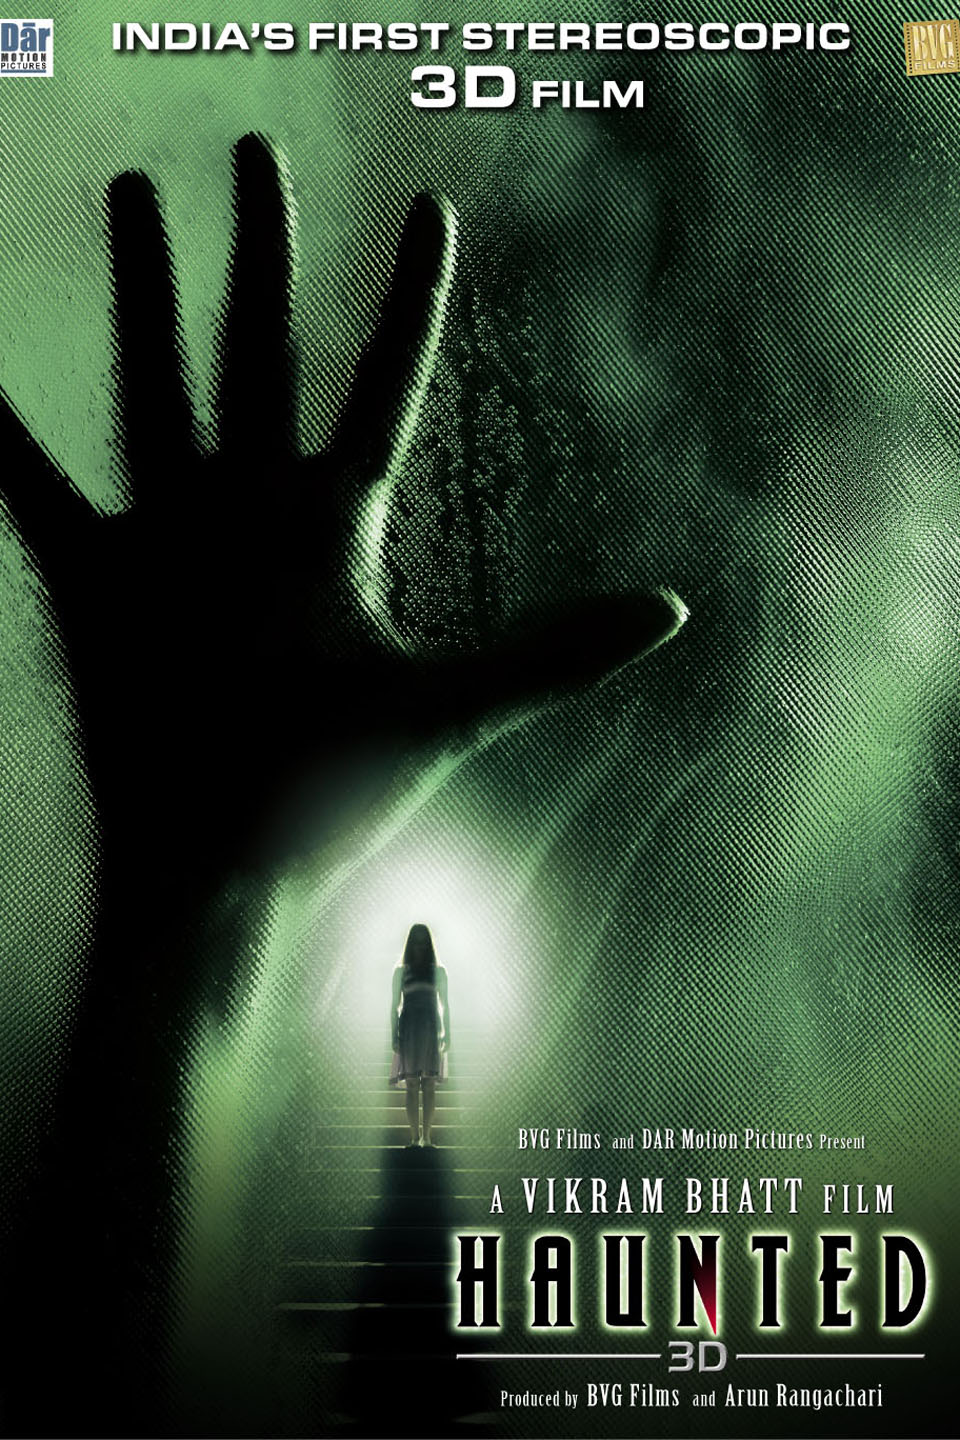

weights (1, 1, 1, 2048)
reshaped (1, 2048)
[13  9  4]
13
9
4


[u'Mystery', u'Thriller', u'Horror']

In [268]:
test_images("Haunted.jpg")

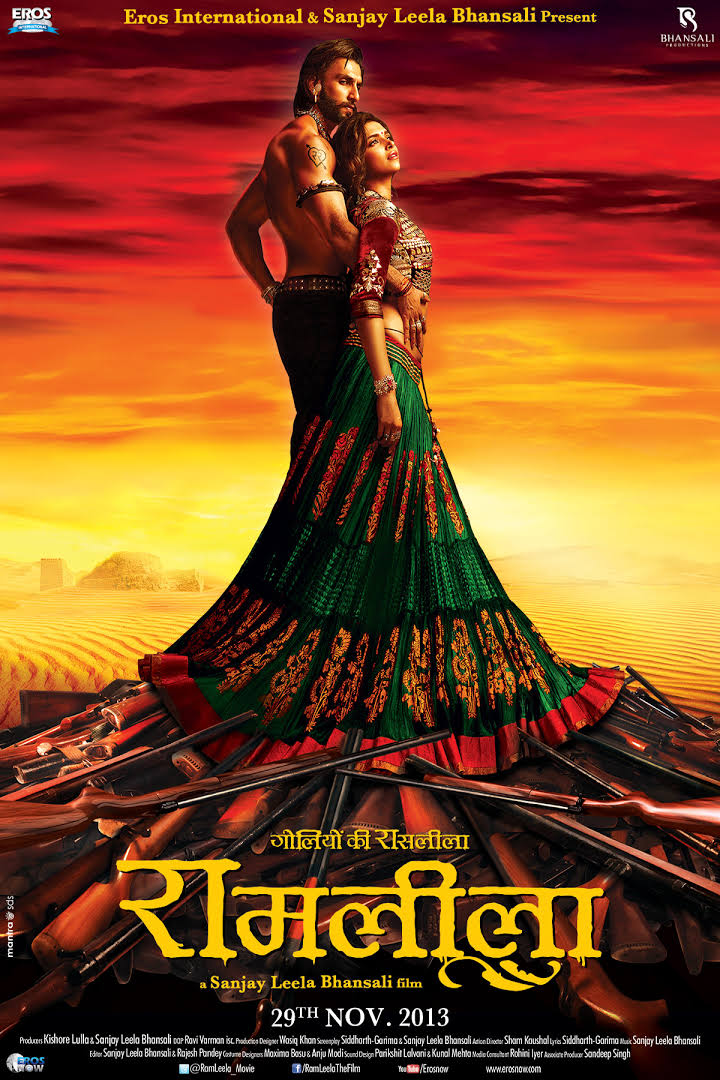

weights (1, 1, 1, 2048)
reshaped (1, 2048)
[15 12  1]
15
12
1


[u'Romance', u'Science Fiction', u'Fantasy']

In [269]:
test_images("Ramleela.jpeg")

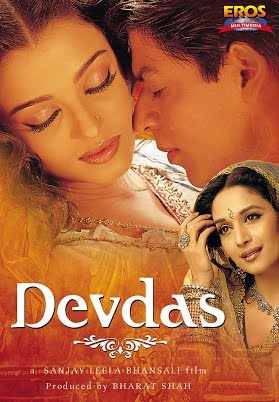

weights (1, 1, 1, 2048)
reshaped (1, 2048)
[ 7  3 15]
7
3
15


[u'History', u'Drama', u'Romance']

In [270]:
test_images('devdaas.jpg')

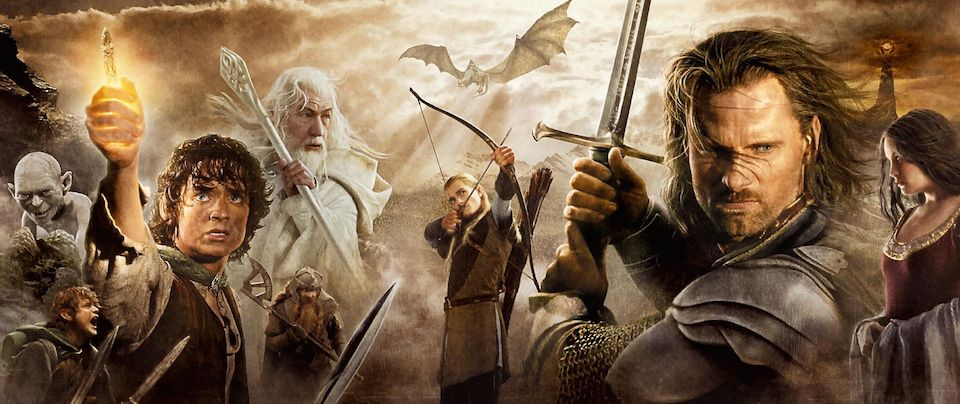

weights (1, 1, 1, 2048)
reshaped (1, 2048)
[5 4 0]
5
4
0


[u'Action', u'Horror', u'Adventure']

In [271]:
test_images("lotr.jpeg")

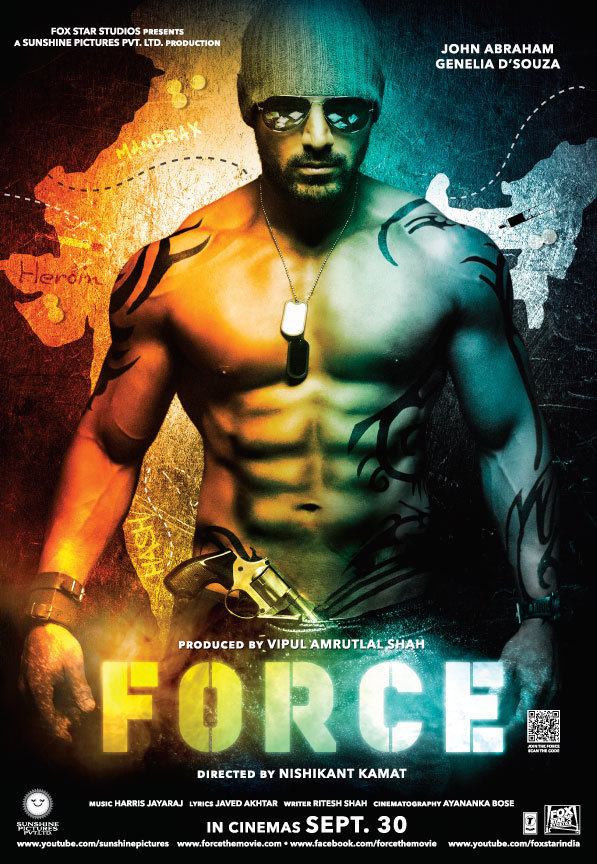

weights (1, 1, 1, 2048)
reshaped (1, 2048)
[4 9 5]
4
9
5


[u'Horror', u'Thriller', u'Action']

In [272]:
test_images("force.jpg")

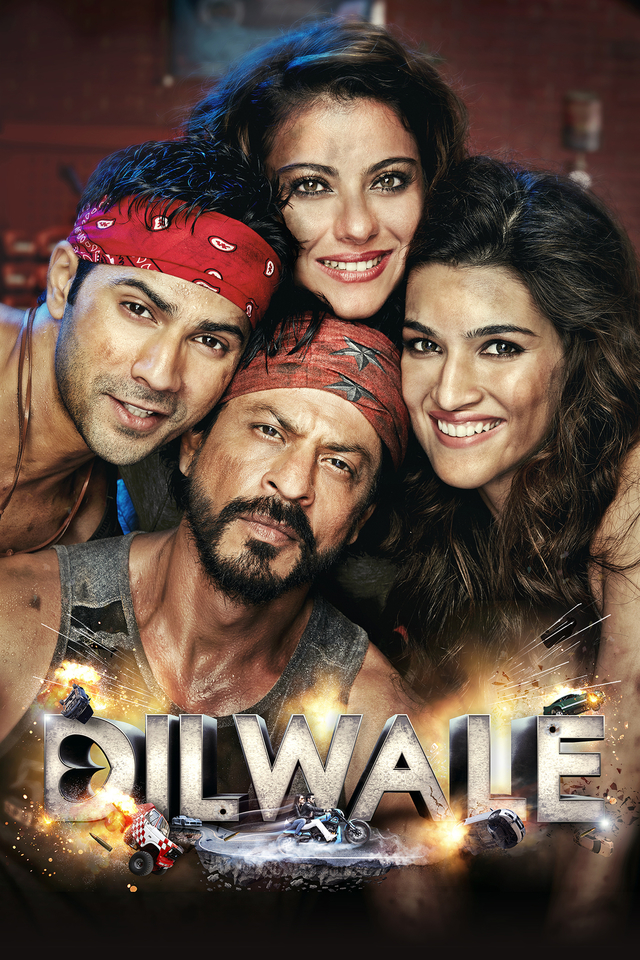

weights (1, 1, 1, 2048)
reshaped (1, 2048)
[15  9  6]
15
9
6


[u'Romance', u'Thriller', u'Comedy']

In [273]:
test_images("dilwale.jpg")

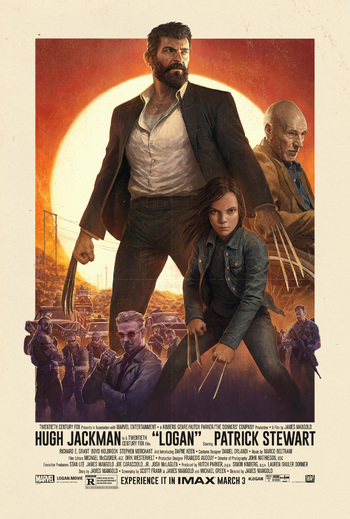

weights (1, 1, 1, 2048)
reshaped (1, 2048)
[19  3 16]
19
3
16


[u'TV Movie', u'Drama', u'Family']

In [278]:
test_images("logan.jpg")

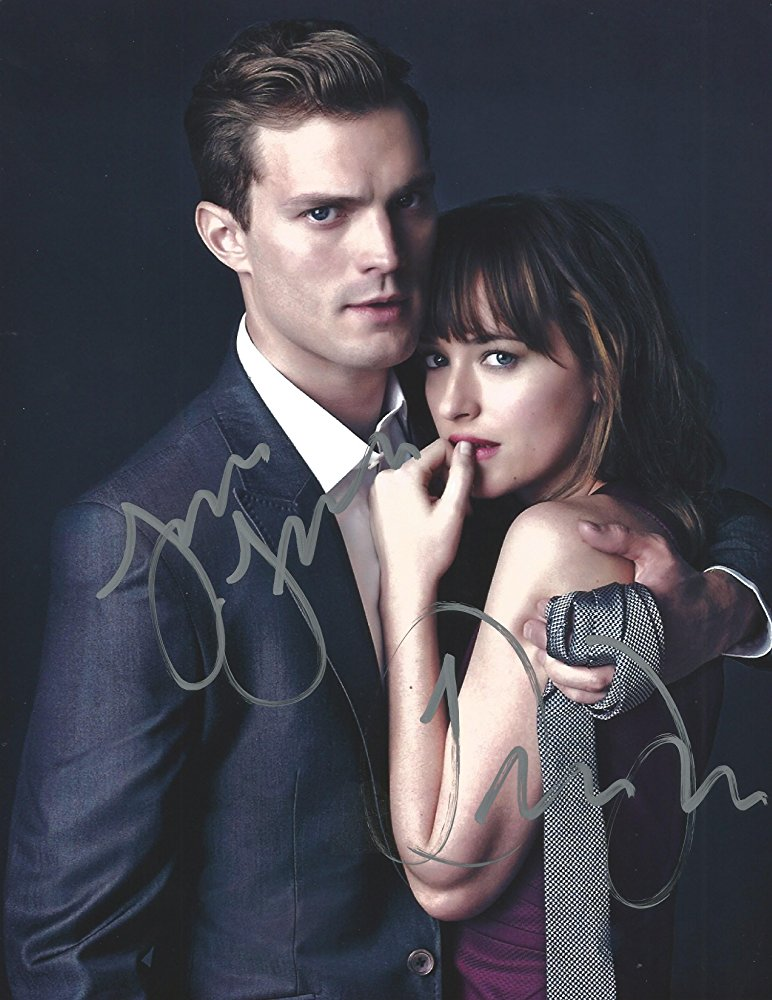

weights (1, 1, 1, 2048)
reshaped (1, 2048)
[ 6 11 14]
6
11
14


[u'Comedy', u'Documentary', u'Music']

In [279]:
test_images("fifty.jpg")

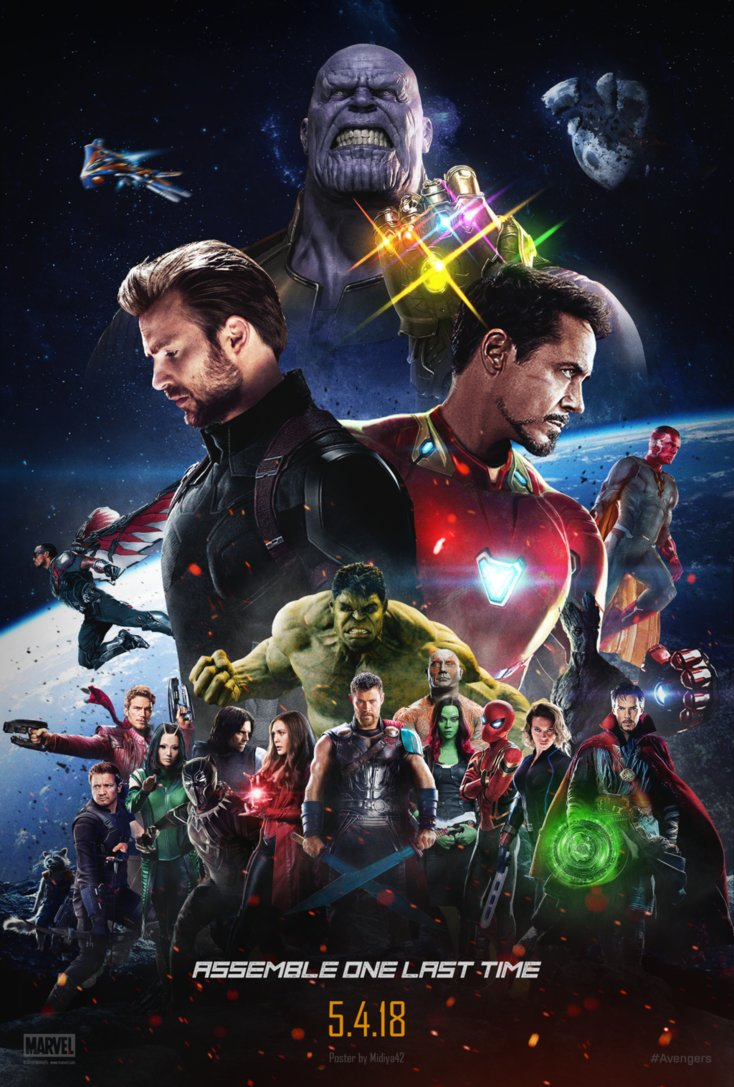

weights (1, 1, 1, 2048)
reshaped (1, 2048)
[ 1  5 12]
1
5
12


[u'Fantasy', u'Action', u'Science Fiction']

In [283]:
test_images("infinty_wars.jpg")

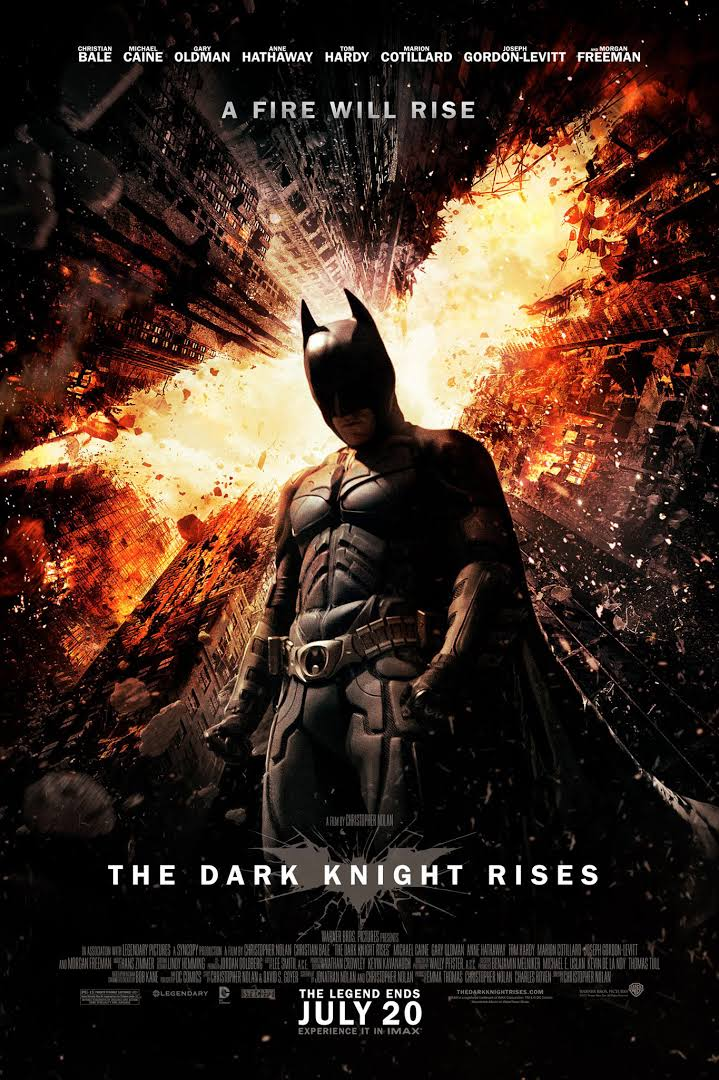

weights (1, 1, 1, 2048)
reshaped (1, 2048)
[7 5 3]
7
5
3


[u'History', u'Action', u'Drama']

In [285]:
test_images("darknight.jpeg")